## Part A. Preliminaries

## 3. Acquiring dataset

In [1]:
import pandas as pd #data loader library
import matplotlib.pyplot as plt #graph visualization library
import numpy as np
#iris dataset을 얻고 class별로 분리해놓는다.
df = pd.read_csv('./iris/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
se=df[df['class'] =='Iris-setosa']
ve=df[df['class']=='Iris-versicolor']
vi=df[df['class']=='Iris-virginica']

## Part B. Iris classification using text data

## 1.

### Sepal Length 
- Histogram

In [2]:
#각 3개 클래스의 sepal length attribute의 최솟값과 최댓값을 본다.
print(se['sepal length'].min())
print(se['sepal length'].max())
print(ve['sepal length'].min())
print(ve['sepal length'].max())
print(vi['sepal length'].min())
print(vi['sepal length'].max())

4.3
5.8
4.9
7.0
4.9
7.9


<function matplotlib.pyplot.show(close=None, block=None)>

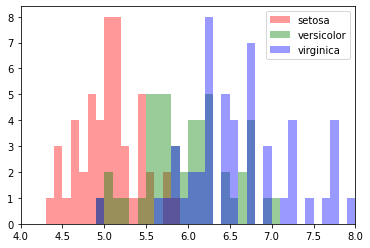

In [3]:
#sepal length attribute에 대한 histogram을 그린다.
plt.hist(se['sepal length'], label='setosa', alpha=0.4, bins=40, color='red', range=[4,8])
plt.hist(ve['sepal length'], label='versicolor', alpha=0.4, bins=40, color='green', range = [4,8])
plt.hist(vi['sepal length'], label='virginica', alpha=0.4, bins=40, color='blue', range = [4,8])
plt.xlim([4,8])
plt.legend()
plt.show

- Optimal decision boundaries

첫 번째 boundary :  5.5
두 번째 boundary :  6.2
cost :  38


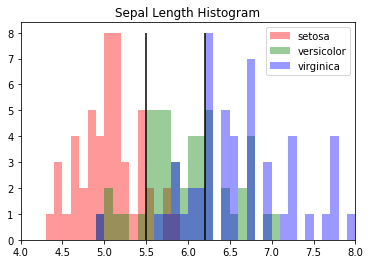

In [4]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#cost는 misclassification된 instance 개수이다.
#첫 번째 decision boundary는 4.3부터 7.0까지 0.1씩 증가시켜본다.
#두 번째 decision boundary는 4.9부터 7.9까지 0.1씩 증가시켜본다.
final_boundary1 = 0
final_boundary2 = 0
cost = 150
boundary1 = 4.2
for i in range(28):
    boundary1 += 0.1
    boundary1 = round(boundary1, 2)
    boundary2 = 4.8
    for j in range(31):
        boundary2 += 0.1
        boundary2 = round(boundary2, 2)
        if boundary1 > boundary2 : continue
        
        #첫 번째 decision boundary 미만일 때 setosa class라고 분류한다.
        se_p = df[df['sepal length'] < boundary1] #setosa positive
        se_tp = se_p[se_p['class'] =='Iris-setosa'] #setosa true positive 
        
        #첫 번째 decision boundary 이상이고 두 번째 decision boundary 미만일 때 versicolor class라고 분류한다.
        temp = df[df['sepal length'] >= boundary1] #versicolor positive
        ve_p = temp[temp['sepal length'] < boundary2] 
        ve_tp = ve_p[ve_p['class'] == 'Iris-versicolor'] #versicolor true positive
        
        #두 번째 decision boundary 이상일 때 virginica class라고 분류한다.
        vi_p = df[df['sepal length'] >= boundary2] #virginica positive
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica'] #virginica true positive
        
        se_fp_n = len(se_p) - len(se_tp) #setosa false positive의 개수
        ve_fp_n = len(ve_p) - len(ve_tp) #versicolor false positive의 개수
        vi_fp_n = len(vi_p) - len(vi_tp) #virginica false positive의 개수
        
        c = se_fp_n + ve_fp_n + vi_fp_n #총 cost
        
        #cost가 제일 작은 것으로 decision boundary를 update해준다.
        if c < cost :
            cost = c
            final_boundary1 = boundary1
            final_boundary2 = boundary2
            
print("첫 번째 boundary : ", str(final_boundary1))
print("두 번째 boundary : ", str(final_boundary2))
print("cost : ", str(cost))

#두 개의 decision boundary가 표시된 sepal length attribute에 대한 histogram을 그린다.
plt.hist(se['sepal length'], label='setosa', alpha=0.4, bins=40, color='red', range=[4,8])
plt.hist(ve['sepal length'], label='versicolor', alpha=0.4, bins=40, color='green', range = [4,8])
plt.hist(vi['sepal length'], label='virginica', alpha=0.4, bins=40, color='blue', range = [4,8])
plt.xlim([4,8])
plt.vlines(final_boundary1, 0, 8, colors = 'black', linestyle = 'solid')
plt.vlines(final_boundary2, 0, 8, colors = 'black', linestyle = 'solid')
plt.title('Sepal Length Histogram')
plt.legend()
plt.show()


###  Sepal Width 
- Histogram

In [5]:
#각 3개 클래스의 sepal width attribute의 최솟값과 최댓값을 본다.
print(se['sepal width'].max())
print(se['sepal width'].min())
print(ve['sepal width'].max())
print(ve['sepal width'].min())
print(vi['sepal width'].max())
print(vi['sepal width'].min())

4.4
2.3
3.4
2.0
3.8
2.2


<function matplotlib.pyplot.show(close=None, block=None)>

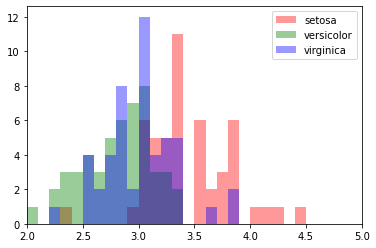

In [6]:
#sepal width attribute에 대한 histogram을 그린다.
plt.hist(se['sepal width'], label='setosa', alpha=0.4, bins=30, color='red', range=[2,5])
plt.hist(ve['sepal width'], label='versicolor', alpha=0.4, bins=30, color='green', range = [2,5])
plt.hist(vi['sepal width'], label='virginica', alpha=0.4, bins=30, color='blue', range = [2,5])
plt.xlim([2,5])
plt.legend()
plt.show

- Optimal decision boundaries

첫 번째 boundary :  3.0
두 번째 boundary :  3.1
cost :  62


<function matplotlib.pyplot.show(close=None, block=None)>

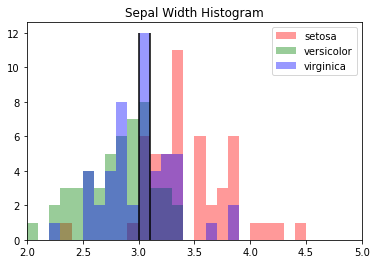

In [7]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#cost는 misclassification된 instance 개수이다.
#첫 번째 decision boundary는 2.0부터 3.8까지 0.1씩 증가시켜본다.
#두 번째 decision boundary는 2.2부터 4.4까지 0.1씩 증가시켜본다.
final_boundary1 = 0
final_boundary2 = 0
cost = 150
boundary1 = 1.9
for i in range(19):
    boundary1 += 0.1
    boundary1 = round(boundary1, 2)
    boundary2 = 2.1
    for j in range(23):
        boundary2 += 0.1
        boundary2 = round(boundary2, 2)
        if boundary1 > boundary2 : continue
            
        #첫 번째 decision boundary 미만일 때 versicolor class라고 분류한다.
        ve_p = df[df['sepal width'] < boundary1] #versicolor positive
        ve_tp = ve_p[ve_p['class'] =='Iris-versicolor'] #versicolor true positive
        
        #첫 번째 decision boundary 이상이고 두 번째 decision boundary 미만일 때 virginica class라고 분류한다.
        temp = df[df['sepal width'] >= boundary1] #virginica positive
        vi_p = temp[temp['sepal width'] < boundary2]
        vi_tp = vi_p[vi_p['class'] == 'Iris-virginica'] #virginica true positive
        
        #두 번째 decision boundary 이상일 때 setosa class라고 분류한다.
        se_p = df[df['sepal width'] >= boundary2] #setosa positive
        se_tp = se_p[se_p['class'] =='Iris-setosa'] #setosa true positive
        
        se_fp_n = len(se_p) - len(se_tp) #setosa false positive의 개수
        ve_fp_n = len(ve_p) - len(ve_tp) #versicolor false positive의 개수
        vi_fp_n = len(vi_p) - len(vi_tp) #virginica false positive의 개수
        
        c = se_fp_n + ve_fp_n + vi_fp_n #총 cost
        #cost가 제일 작은 것으로 decision boundary를 update해준다.
        if c < cost :
            cost = c
            final_boundary1 = boundary1
            final_boundary2 = boundary2
            
print("첫 번째 boundary : ", str(final_boundary1))
print("두 번째 boundary : ", str(final_boundary2))
print("cost : ", str(cost))

#두 개의 decision boundary가 표시된 sepal width attribute에 대한 histogram을 그린다.
plt.hist(se['sepal width'], label='setosa', alpha=0.4, bins=30, color='red', range=[2,5])
plt.hist(ve['sepal width'], label='versicolor', alpha=0.4, bins=30, color='green', range = [2,5])
plt.hist(vi['sepal width'], label='virginica', alpha=0.4, bins=30, color='blue', range = [2,5])
plt.xlim([2,5])
plt.vlines(final_boundary1, 0, 12, colors = 'black', linestyle = 'solid')
plt.vlines(final_boundary2, 0, 12, colors = 'black', linestyle = 'solid')
plt.title('Sepal Width Histogram')
plt.legend()
plt.show

###  Petal Length 
- Histogram

In [8]:
#각 3개 클래스의 petal length attribute의 최솟값과 최댓값을 본다.
print(se['petal length'].max())
print(se['petal length'].min())
print(ve['petal length'].max())
print(ve['petal length'].min())
print(vi['petal length'].max())
print(vi['petal length'].min())

1.9
1.0
5.1
3.0
6.9
4.5


<function matplotlib.pyplot.show(close=None, block=None)>

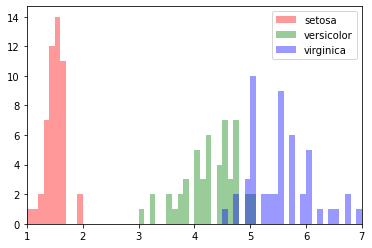

In [9]:
#petal length attribute에 대한 histogram을 그린다.
plt.hist(se['petal length'], label='setosa', alpha=0.4, bins=60, color = 'red', range=[1,7])
plt.hist(ve['petal length'], label='versicolor', alpha=0.4, bins=60, color = 'green', range = [1,7])
plt.hist(vi['petal length'], label='virginica', alpha=0.4, bins=60, color = 'blue', range = [1,7])
plt.xlim([1,7])
plt.legend()
plt.show

- Optimal decision boundaries

첫 번째 boundary :  2.0
두 번째 boundary :  4.8
cost :  7


<function matplotlib.pyplot.show(close=None, block=None)>

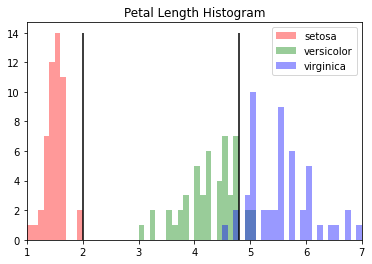

In [10]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#cost는 misclassification된 instance 개수이다.
#첫 번째 decision boundary는 1.0부터 5.1까지 0.1씩 증가시켜본다.
#두 번째 decision boundary는 3.0부터 6.9까지 0.1씩 증가시켜본다.
final_boundary1 = 0
final_boundary2 = 0
cost = 150
boundary1 = 0.9
for i in range(42):
    boundary1 += 0.1
    boundary1 = round(boundary1, 2)
    boundary2 = 2.9
    for j in range(40):
        boundary2 += 0.1
        boundary2 = round(boundary2, 2)
        if boundary1 > boundary2 : continue
        
        #첫 번째 decision boundary 미만일 때 setosa class라고 분류한다.
        se_p = df[df['petal length'] < boundary1] #setosa positive
        se_tp = se_p[se_p['class'] =='Iris-setosa'] #setosa true positive
        
        #첫 번째 decision boundary 이상이고 두 번째 decision boundary 미만일 때 versicolor class라고 분류한다.
        temp = df[df['petal length'] >= boundary1] #versicolor positive
        ve_p = temp[temp['petal length'] < boundary2]
        ve_tp = ve_p[ve_p['class'] == 'Iris-versicolor'] #versicolor true positive
        
        #두 번째 decision boundary 이상일 때 virginica class라고 분류한다.
        vi_p = df[df['petal length'] >= boundary2] #virginica positive
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica'] #virginica true positive
        
        se_fp_n = len(se_p) - len(se_tp) #setosa false positive의 개수
        ve_fp_n = len(ve_p) - len(ve_tp) #versicolor false positive의 개수
        vi_fp_n = len(vi_p) - len(vi_tp) #virginica false positive의 개수
        
        c = se_fp_n + ve_fp_n + vi_fp_n #총 cost
        #cost가 제일 작은 것으로 decision boundary를 update해준다.
        if c < cost :
            cost = c
            final_boundary1 = boundary1
            final_boundary2 = boundary2
            
print("첫 번째 boundary : ", str(final_boundary1))
print("두 번째 boundary : ", str(final_boundary2))
print("cost : ", str(cost))

#두 개의 decision boundary가 표시된 petal length attribute에 대한 histogram을 그린다.
plt.hist(se['petal length'], label='setosa', alpha=0.4, bins=60, color = 'red', range=[1,7])
plt.hist(ve['petal length'], label='versicolor', alpha=0.4, bins=60, color = 'green', range = [1,7])
plt.hist(vi['petal length'], label='virginica', alpha=0.4, bins=60, color = 'blue', range = [1,7])
plt.xlim([1,7])
plt.vlines(final_boundary1, 0, 14, colors = 'black', linestyle = 'solid')
plt.vlines(final_boundary2, 0, 14, colors = 'black', linestyle = 'solid')
plt.title('Petal Length Histogram')
plt.legend()
plt.show

###  Petal Width 
- Histogram

In [11]:
#각 3개 클래스의 petal width attribute의 최솟값과 최댓값을 본다.
print(se['petal width'].max())
print(se['petal width'].min())
print(ve['petal width'].max())
print(ve['petal width'].min())
print(vi['petal width'].max())
print(vi['petal width'].min())

0.6
0.1
1.8
1.0
2.5
1.4


<function matplotlib.pyplot.show(close=None, block=None)>

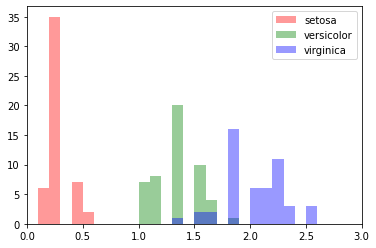

In [12]:
#petal width attribute에 대한 histogram을 그린다.
plt.hist(se['petal width'], label='setosa', alpha=0.4, bins=30, color='red', range=[0,3])
plt.hist(ve['petal width'], label='versicolor', alpha=0.4, bins=30, color='green', range = [0,3])
plt.hist(vi['petal width'], label='virginica', alpha=0.4, bins=30, color='blue', range = [0,3])
plt.xlim([0,3])
plt.legend()
plt.show

- Optimal decision boundaries

첫 번째 boundary :  0.7
두 번째 boundary :  1.7
cost :  6


<function matplotlib.pyplot.show(close=None, block=None)>

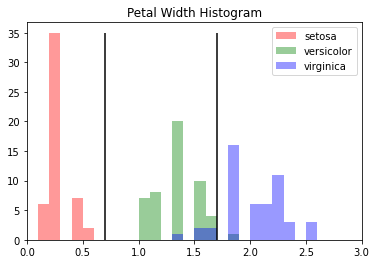

In [13]:
#for문을 돌려 2개의 optimal한 decision boundary를 찾는다.
#cost는 misclassification된 instance 개수이다.
#첫 번째 decision boundary는 0.1부터 1.8까지 0.1씩 증가시켜본다.
#두 번째 decision boundary는 1.0부터 2.5까지 0.1씩 증가시켜본다.
final_boundary1 = 0
final_boundary2 = 0
cost = 150
boundary1 = 0.0
for i in range(18):
    boundary1 += 0.1
    boundary1 = round(boundary1, 2)
    boundary2 = 0.9
    for j in range(16):
        boundary2 += 0.1
        boundary2 = round(boundary2, 2)
        if boundary1 > boundary2 : continue
        
        #첫 번째 decision boundary 미만일 때 setosa class라고 분류한다.
        se_p = df[df['petal width'] < boundary1] #setosa positive
        se_tp = se_p[se_p['class'] =='Iris-setosa'] #setosa true positive
        
        #첫 번째 decision boundary 이상이고 두 번째 decision boundary 미만일 때 versicolor class라고 분류한다.
        temp = df[df['petal width'] >= boundary1] #versicolor positive
        ve_p = temp[temp['petal width'] < boundary2]
        ve_tp = ve_p[ve_p['class'] == 'Iris-versicolor'] #versicolor true positive
        
        #두 번째 decision boundary 이상일 때 virginica class라고 분류한다.
        vi_p = df[df['petal width'] >= boundary2] #virginica positive
        vi_tp = vi_p[vi_p['class'] =='Iris-virginica'] #virginica true positive
        
        se_fp_n = len(se_p) - len(se_tp) #setosa false positive의 개수
        ve_fp_n = len(ve_p) - len(ve_tp) #versicolor false positive의 개수
        vi_fp_n = len(vi_p) - len(vi_tp) #virginica false positive의 개수
        
        c = se_fp_n + ve_fp_n + vi_fp_n #총 cost
        #cost가 제일 작은 것으로 decision boundary를 update해준다.
        if c < cost :
            cost = c
            final_boundary1 = boundary1
            final_boundary2 = boundary2
print("첫 번째 boundary : ", str(final_boundary1))
print("두 번째 boundary : ", str(final_boundary2))
print("cost : ", str(cost))

#두 개의 decision boundary가 표시된 petal width attribute에 대한 histogram을 그린다.
plt.hist(se['petal width'], label='setosa', alpha=0.4, bins=30, color = 'red', range=[0,3])
plt.hist(ve['petal width'], label='versicolor', alpha=0.4, bins=30, color = 'green', range = [0,3])
plt.hist(vi['petal width'], label='virginica', alpha=0.4, bins=30, color = 'blue', range = [0,3])
plt.xlim([0,3])
plt.vlines(final_boundary1, 0, 35, colors = 'black', linestyle = 'solid')
plt.vlines(final_boundary2, 0, 35, colors = 'black', linestyle = 'solid')
plt.title('Petal Width Histogram')
plt.legend()
plt.show